In [165]:
from collections import Counter
import pickle
import sentencepiece as spm
from matplotlib import pyplot as plt
import re

In [227]:
def sentence_piece(vocab_path):
    sp = spm.SentencePieceProcessor()
    sp.Load(vocab_path)
    n_words = len(sp)
    return sp, n_words

In [457]:
def calc_unk(unk_uttrs, vocab_path):
    s = r"[！”＃＄％＆’（）＝～｜‘｛＋＊｝＜＞？＿－＾￥＠「；：」、。・\\p{Punct}]*"
    sp, _ = sentence_piece(vocab_path)
    unk_uttrs = unk_uttrs
    uttr_decode = [sp.DecodeIds(sp.EncodeAsIds(uttr)) for uttr in unk_uttrs]
    print(len(unk_uttrs), len(uttr_decode))
    #unk_word = [[ud for ud in unk_uttrs[i] if ud not in uu and not re.search(ud, s)] for i, uu in enumerate(uttr_decode)]
    unk_word = []
    [[unk_word.append(ud.strip("[！,？]*")) for ud in unk_uttrs[i] if ud not in uu and ud.strip("[！,？,!,?]*") != ""] for i, uu in enumerate(uttr_decode)]
    return unk_word

In [458]:
def vocab_count(dial_path, vocab_path):
    f_dial = open(dial_path, 'r')
    dial = f_dial.readlines()[:100000]
    sp, n_words = sentence_piece(vocab_path)
    uttrs = []
    [uttrs.append(i) for j in dial for i in j.strip().split('\t')]
    data = [sp.EncodeAsIds(i) for i in uttrs]
    dial_vocab = []
    unk_vocab = []
    [[dial_vocab.append(i) if i != 3 else (dial_vocab.append(i),unk_vocab.append(uttrs[n])) for i in j] for n, j in enumerate(data)]
    #try:
    unk_words = calc_unk(unk_vocab, vocab_path)
    #except:
    #    unk_words = 0
    c = Counter(dial_vocab)
    words_len = sum(c.values())
    words_rate = [c[i]/words_len for i in range(n_words)]
    #unk_len = c[3]
    return c, n_words, words_len, unk_words, unk_vocab, words_rate

In [459]:
def calc_cover1(unk_words, word_len):
    return 1.0 - len(unk_words)/word_len

In [460]:
def calc_cover2(c1, c2, word_len):  
    return 1.0 - len(unk_words)/word_len

In [501]:
dial_path1 = "../data/em_dial/splitted/cleaning/train_dial.txt"
dial_path1a = "../data/em_dial/splitted/all/train_dial.txt"
dial_path2 = "../data/op_sub_dial/splitted/train_dial.txt"
dial_path3 = "../data/twitter_dial/splitted/train_dial.txt"
vocab_path1 = "../data/twitter_dial/vocab/spvocab.model"
vocab_path2 =  "../data/op_sub_dial/vocab/spvocab.model"
c11, n11, w11, u11, uv11, wr11 = vocab_count(dial_path1, vocab_path1)
c12, n12, w12, u12, uv12, wr12 = vocab_count(dial_path1, vocab_path2)
c1a1, n1a1, w1a1, u1a1, uv1a1, wr1a1 = vocab_count(dial_path1a, vocab_path1)
c1a2, n1a2, w1a2, u1a2, uv1a2, wr1a2 = vocab_count(dial_path1a, vocab_path2)

7 7
874 874
43 43
4492 4492


In [323]:
c21, n21, w21, u21, uv21, wr21 = vocab_count(dial_path2, vocab_path1)
c22, n22, w22, u22, uv22, wr22 = vocab_count(dial_path2, vocab_path2)

1465 1465
1279 1279


In [470]:
c31, n31, w31, u31, uv31, wr31 = vocab_count(dial_path3, vocab_path1)

1834 1834


0.036347775516138416

In [483]:
print(w11,w12,w1a1,w1a2,w21,w22,w31)

24073 23940 115093 115013 1183464 999684 1897317


In [482]:
print(calc_cover(uv11,w11))
print(calc_cover(uv12,w12))
print(calc_cover(uv1a1,w1a1))
print(calc_cover(uv1a2,w1a2))
print(calc_cover(uv21,w21))
print(calc_cover(uv22,w22))
print(calc_cover(uv31,w31))

0.9997092177958709
0.9634920634920635
0.999626389094037
0.9609435455122465
0.9987621085221012
0.9987205957082438
0.9990333718614233


In [437]:
cu12 = Counter(u12)
cu11 = Counter(u11)

In [425]:
sum(cu12.values())

1200

In [453]:
len([u.strip("[！,？]*")  for u in u12 if u.strip("[！,？,!,?]*") != ""])

189

In [407]:
cu11.most_common()[:]

[]

In [506]:
c11[31998]

473

In [505]:
c21[31995]

0

In [498]:
sp_op, _  = sentence_piece(vocab_path1)
sp.EncodeAsIds("!")
#sp.DecodeIds([31995, 31998])

[4, 31995]

In [181]:
c3, n3, w3, u3, wr3 = vocab_count(dial_path3, vocab_path1)

In [210]:
print(re.search("？", "[！,？]"))

<_sre.SRE_Match object; span=(3, 4), match='？'>


In [473]:
uv31[:50]

['たかせも苫小牧くるって',
 'ほわほわ〜〜 ˙Ꙫ˙',
 ' だから 斑目 貘だって´ω｀ﾌﾞﾌｫwww',
 ' だから 斑目 貘だって´ω｀ﾌﾞﾌｫwww',
 'あるあるだね 持ってる人は持ってるということか…▂▅▇█▓▒░’ω’░▒▓█▇▅▂うわあああああ',
 'あるあるだね 持ってる人は持ってるということか…▂▅▇█▓▒░’ω’░▒▓█▇▅▂うわあああああ',
 'あるあるだね 持ってる人は持ってるということか…▂▅▇█▓▒░’ω’░▒▓█▇▅▂うわあああああ',
 'あるあるだね 持ってる人は持ってるということか…▂▅▇█▓▒░’ω’░▒▓█▇▅▂うわあああああ',
 '怜乎が可愛くてつい…',
 '伶さんの先生ですか',
 'おう アヘ顏ダブルピースの顔文字化の煽り',
 '뭔가 특산물 느낌 가득이에요',
 '뭔가 특산물 느낌 가득이에요',
 '뭔가 특산물 느낌 가득이에요',
 '뭔가 특산물 느낌 가득이에요',
 'ラーメンは全然わからないミャオ…橿原周辺ミャオ',
 'お恥ずかしいですがその通りです️ ⍨ ️',
 'どうなんだろうww 割と20代と10代の折衷かもよww',
 '疚しいこと考えてそう',
 '優斗ありがとーっプレゼントが今届いた〜 母カンゲキっ 大切に着るね♡ •·τнänκ чöü·•๑ºั╰╯ºั๑ 愛してるよ…',
 '優斗ありがとーっプレゼントが今届いた〜 母カンゲキっ 大切に着るね♡ •·τнänκ чöü·•๑ºั╰╯ºั๑ 愛してるよ…',
 '優斗ありがとーっプレゼントが今届いた〜 母カンゲキっ 大切に着るね♡ •·τнänκ чöü·•๑ºั╰╯ºั๑ 愛してるよ…',
 '優斗ありがとーっプレゼントが今届いた〜 母カンゲキっ 大切に着るね♡ •·τнänκ чöü·•๑ºั╰╯ºั๑ 愛してるよ…',
 ' あ、二宮くんだ お迎えありがとうね いやー 、嬉しいなぁ ♚',
 'はい。たぶん、それで地面のパースと比較して辻褄が合わなくなってるんだと思います',
 '禮の言う通りだよ。本当紙一重だよな。要らん事って笑賑やかなの俺、いきなりそんな所お邪魔して大丈夫かな禮がキリンさんになる前になるべく行きたいと思います。',
 '禮の言う通りだよ。本当紙一重だよな。要らん事って笑賑やかなの俺、いき

In [222]:
def calc_cover(unk_words, word_len):
    return 1.0 - len(unk_words)/word_len

In [224]:
print(calc_cover(u1,w1))
print(calc_cover(u2,w2))
print(calc_cover(u3,w3))

0.9997091332169866
0.9987621085221012
0.9991926090217166


In [146]:
sp, _ = sentence_piece(vocab_path)
sp.EncodeAsIds(u1[0])

[16907, 2640, 3, 6414, 4078, 391, 6]

# Plot word rate

In [11]:
#for i wr in range enumerate(wr1):
import numpy as np

def graph_plot(word_rate, n_word, co, max_y):
    x = np.arange(0, n_word-4, 1)
    y = np.array(word_rate[4:])
    plt.bar(x,y, color=co)
    plt.title("Frequency of occurrence of token")
    plt.xlabel("token id")
    plt.ylabel("frequency of appearance")
    plt.ylim(0,max_y)
    plt.show
    
def graph_plot(word_rate, n_word, co, max_y):
    x = np.arange(0, n_word-4, 1)
    y = np.array(word_rate[4:])
    plt.bar(x,y, color=co)
    plt.title("")
    plt.ylim(0,max_y)
    plt.show

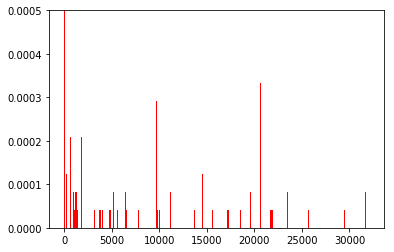

In [24]:
graph_plot(wr1, n1, 'r', 0.0005)

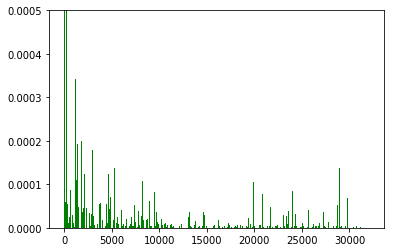

In [107]:
graph_plot(wr2, n2, 'g', 0.0005)

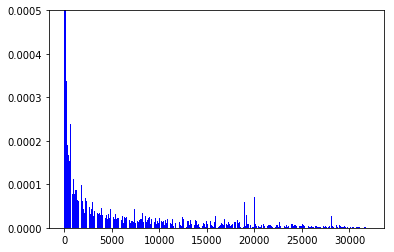

In [108]:
graph_plot(wr3, n3, 'b', 0.0005) 

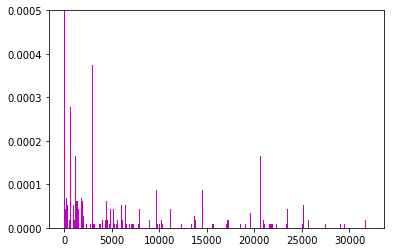

In [486]:
graph_plot(wr1a1, n1a1, 'm', 0.0005) 

# Freqency word 

In [ ]:
def calc_freq(count, vocab_path, num=20):
    sp = spm.SentencePieceProcessor()
    sp.Load(vocab_path)
    freq_id = [i[0] for i in count.most_common(num)]
    num_freq = [i[1] for i in count.most_common(num)]
    rare_id = [i[0] for i in count.most_common()[-1:-num-1:-1]]
    num_rare = [i[1] for i in count.most_common()[-1:-num-1:-1]]
    freq_word = [sp.DecodeIds([i]) for i in freq_id]
    rare_word = [sp.DecodeIds([i]) for i in rare_id]
    print("*** Frequency words ***")
    for i in range(num):
        print("id={} word=「{}」 freq={}".format(freq_id[i], freq_word[i], num_freq[i]))
    print("*** Rare words ***")
    for i in range(num):
        print("id={} word=「{}」 freq={}".format(rare_id[i], rare_word[i], num_rare[i]))
    return freq_id, num_freq, freq_word

In [474]:
fre1_id, fre1_n, fre_w = calc_freq(c1, vocab_path, num=30)

*** Frequency words ***
id=6 word=「。」 freq=2411
id=4 word=「」 freq=1258
id=5 word=「、」 freq=937
id=31998 word=「?」 freq=473
id=4996 word=「掃除」 freq=427
id=31995 word=「!」 freq=334
id=11 word=「が」 freq=317
id=23 word=「を」 freq=312
id=22 word=「よ」 freq=304
id=9 word=「は」 freq=219
id=8 word=「の」 freq=202
id=9104 word=「]」 freq=198
id=16 word=「も」 freq=193
id=12 word=「に」 freq=158
id=21793 word=「[」 freq=151
id=1971 word=「部屋」 freq=146
id=27 word=「から」 freq=137
id=15 word=「と」 freq=113
id=659 word=「数」 freq=109
id=30090 word=「詞」 freq=108
id=29 word=「です」 freq=102
id=18 word=「な」 freq=101
id=71 word=「人」 freq=99
id=635 word=「名」 freq=91
id=21 word=「ね」 freq=85
id=26 word=「って」 freq=85
id=69 word=「だよ」 freq=85
id=64 word=「だから」 freq=79
id=16332 word=「ロボット」 freq=77
id=4914 word=「汚い」 freq=69
*** Rare words ***
id=24574 word=「むき」 freq=1
id=8185 word=「わかんない」 freq=1
id=16370 word=「それまでに」 freq=1
id=20476 word=「できるかな」 freq=1
id=8163 word=「しなかった」 freq=1
id=16350 word=「どうなの」 freq=1
id=16347 word=「視力」 freq=1
id=16341 word=「少なく

In [476]:
fre2_id, fre2_n, fre2_w = calc_freq(c2, vocab_path, num=30)

*** Frequency words ***
id=4 word=「」 freq=111910
id=9104 word=「]」 freq=20863
id=23 word=「を」 freq=20508
id=8 word=「の」 freq=19841
id=9 word=「は」 freq=17622
id=5 word=「、」 freq=14961
id=71 word=「人」 freq=13951
id=11 word=「が」 freq=13452
id=21793 word=「[」 freq=12961
id=635 word=「名」 freq=12698
id=12 word=「に」 freq=11471
id=45 word=「だ」 freq=10902
id=6 word=「。」 freq=10149
id=659 word=「数」 freq=8531
id=30090 word=「詞」 freq=8455
id=22 word=「よ」 freq=8330
id=15239 word=「[」 freq=7902
id=15 word=「と」 freq=6822
id=10 word=「で」 freq=5792
id=25 word=「か」 freq=5648
id=18 word=「な」 freq=5303
id=16 word=「も」 freq=5181
id=19 word=「ー」 freq=4760
id=24 word=「・」 freq=3909
id=21 word=「ね」 freq=3698
id=124 word=「んだ」 freq=3458
id=27 word=「から」 freq=3321
id=36 word=「・・・」 freq=3313
id=44 word=「わ」 freq=2813
id=26 word=「って」 freq=2773
*** Rare words ***
id=31953 word=「屓」 freq=1
id=31952 word=「贔」 freq=1
id=30895 word=「と比べて」 freq=1
id=30798 word=「になっちゃいました」 freq=1
id=30607 word=「破裂」 freq=1
id=30176 word=「随」 freq=1
id=29811 word=「漫」 

In [500]:
c1[31995]

334

In [477]:
fre3_id, fre3_n, fre3_w = calc_freq(c3, vocab_path, num=30)

*** Frequency words ***
id=4 word=「」 freq=266798
id=5 word=「、」 freq=207976
id=6 word=「。」 freq=145752
id=7 word=「...」 freq=103243
id=8 word=「の」 freq=66637
id=9 word=「は」 freq=54294
id=11 word=「が」 freq=40179
id=10 word=「で」 freq=37563
id=12 word=「に」 freq=36452
id=13 word=「笑」 freq=35592
id=14 word=「́」 freq=31721
id=16 word=「も」 freq=31323
id=15 word=「と」 freq=30077
id=17 word=「ω」 freq=28745
id=20 word=「w」 freq=28602
id=18 word=「な」 freq=28157
id=21 word=「ね」 freq=27990
id=23 word=「を」 freq=26984
id=22 word=「よ」 freq=26888
id=19 word=「ー」 freq=26516
id=25 word=「か」 freq=22437
id=28 word=「〜」 freq=21498
id=30 word=「......」 freq=21202
id=27 word=「から」 freq=20866
id=26 word=「って」 freq=20423
id=33 word=「～」 freq=19623
id=24 word=「・」 freq=19524
id=36 word=「・・・」 freq=19216
id=37 word=「っ」 freq=16507
id=41 word=「♡」 freq=16286
*** Rare words ***
id=31948 word=「翡」 freq=1
id=31865 word=「殊」 freq=1
id=31834 word=「毘」 freq=1
id=31815 word=「俄」 freq=1
id=31806 word=「滋」 freq=1
id=31756 word=「些」 freq=1
id=31744 word=「璧」 f